In [41]:
import pandas as pd

In [42]:
path_to_file = './data/ParisHousing.csv'
df = pd.read_csv(path_to_file)

In [43]:
df.head() 

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [44]:
# The first five rows of our dataset
df.shape

(10000, 17)

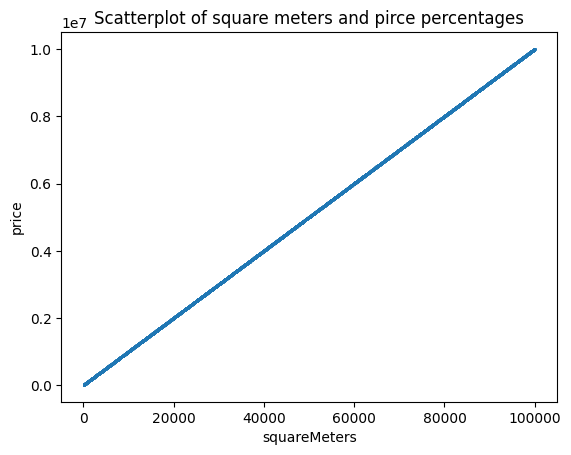

In [46]:
# Realtion between price and square meters
df.plot.scatter(x='squareMeters', y='price', title='Scatterplot of square meters and pirce percentages', s=1);

In [7]:
#  Relationship between each column in your dataset
print(df.corr())

                   squareMeters  numberOfRooms   hasYard   hasPool    floors  \
squareMeters           1.000000       0.009573 -0.006650 -0.005594  0.001109   
numberOfRooms          0.009573       1.000000 -0.011240  0.017015  0.022244   
hasYard               -0.006650      -0.011240  1.000000  0.015514 -0.000883   
hasPool               -0.005594       0.017015  0.015514  1.000000 -0.004006   
floors                 0.001109       0.022244 -0.000883 -0.004006  1.000000   
cityCode              -0.001541       0.009040  0.006760  0.008072  0.002207   
cityPartRange          0.008758       0.008340  0.005023  0.014613 -0.004921   
numPrevOwners          0.016619       0.016766  0.004279 -0.006848  0.002463   
made                  -0.007207       0.003978  0.002214  0.001894  0.005022   
isNewBuilt            -0.010667      -0.002865 -0.008370  0.000188  0.002458   
hasStormProtector      0.007480      -0.001656 -0.007598 -0.001001 -0.008566   
basement              -0.003960      -0.

In [8]:
# Statistical summaries of dataset
print(df.describe().round(2).T)

                     count        mean         std      min         25%  \
squareMeters       10000.0    49870.13    28774.38     89.0    25098.50   
numberOfRooms      10000.0       50.36       28.82      1.0       25.00   
hasYard            10000.0        0.51        0.50      0.0        0.00   
hasPool            10000.0        0.50        0.50      0.0        0.00   
floors             10000.0       50.28       28.89      1.0       25.00   
cityCode           10000.0    50225.49    29006.68      3.0    24693.75   
cityPartRange      10000.0        5.51        2.87      1.0        3.00   
numPrevOwners      10000.0        5.52        2.86      1.0        3.00   
made               10000.0     2005.49        9.31   1990.0     1997.00   
isNewBuilt         10000.0        0.50        0.50      0.0        0.00   
hasStormProtector  10000.0        0.50        0.50      0.0        0.00   
basement           10000.0     5033.10     2876.73      0.0     2559.75   
attic              10000.

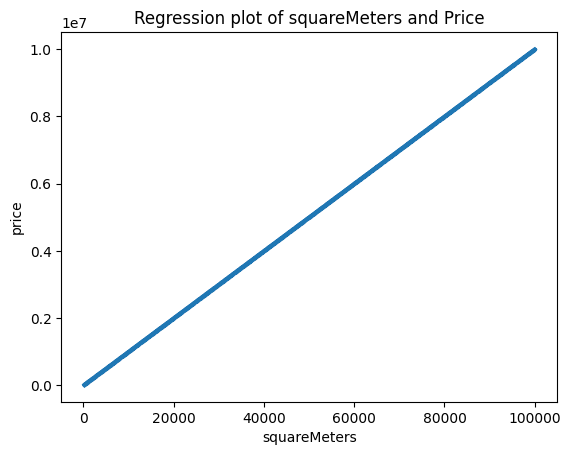

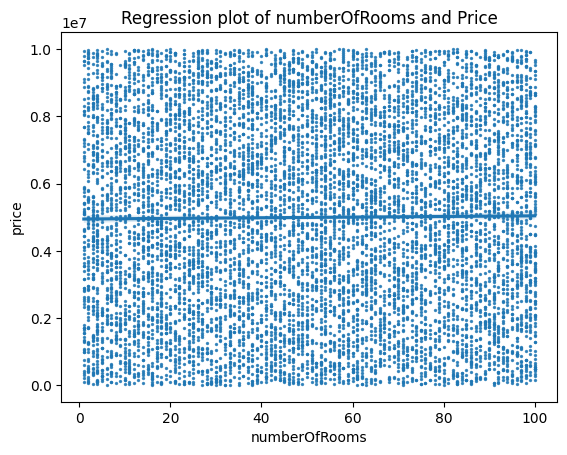

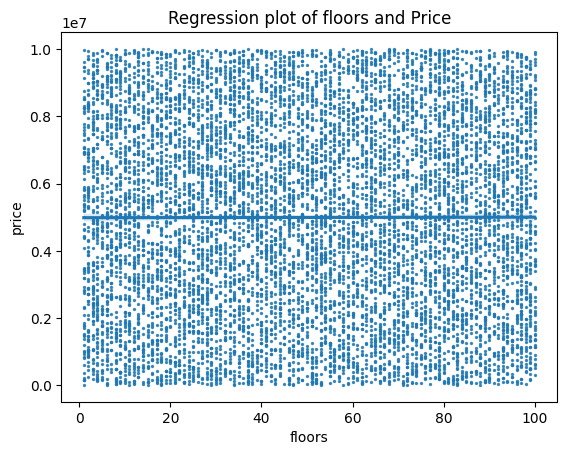

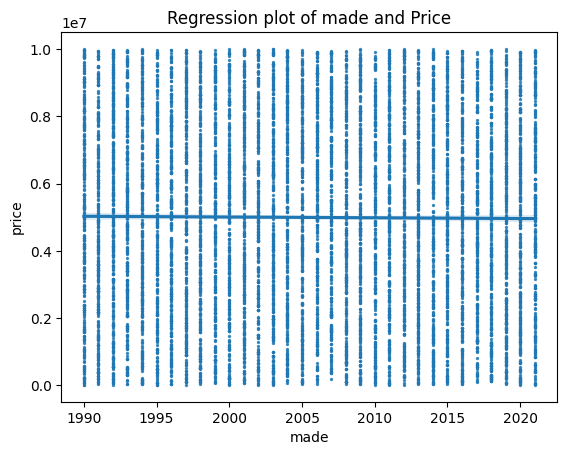

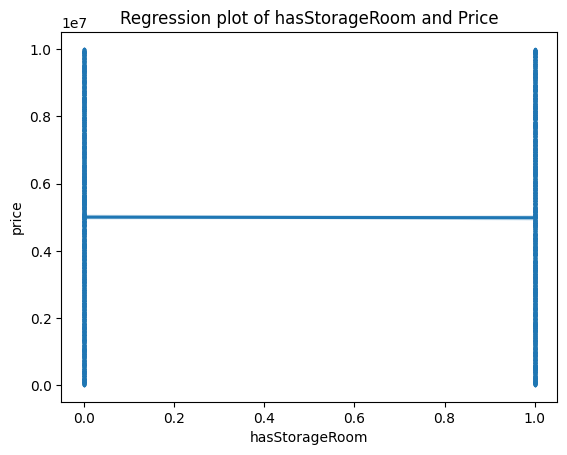

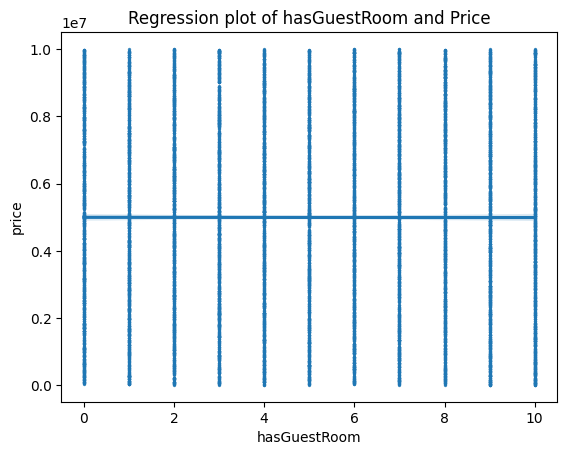

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['squareMeters', 'numberOfRooms', 'floors', 'made', 'hasStorageRoom', 'hasGuestRoom']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df, scatter_kws={'s':2}).set(title=f'Regression plot of {var} and Price');

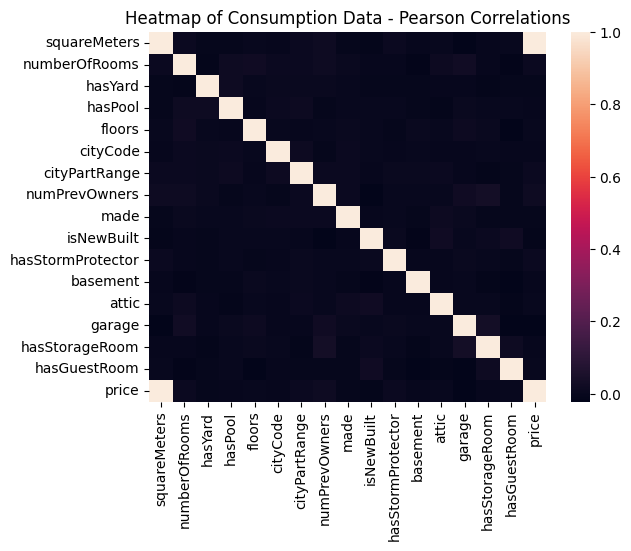

In [10]:
correlations = df.corr()

# The correlation of the new variables
sns.heatmap(correlations, annot=False).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [17]:
# Preparing the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['price']
X = df[['numberOfRooms', 'floors', 'made']]

SEED = 20

# Use 20% of our data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [31]:
# Training the Multivariate Model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# The intercept
regressor.intercept_

7578005.399012756

In [20]:
# The coefficients of the features
regressor.coef_

array([  701.63392185,   156.41346174, -1322.94442056])

In [21]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

               Coefficient value
numberOfRooms         701.633922
floors                156.413462
made                -1322.944421


In [25]:
# Predictions with the Multivariate Regression Model

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2).T})
print(results)

         Actual   Predicted
9957  4161555.9  4961589.75
1687  8540701.6  4982150.67
2116  8067342.1  4945977.98
231   9182083.9  4949617.16
2780  3332408.0  4987480.54
...         ...         ...
7176  4530134.3  4995650.71
5050  8786967.0  4923135.90
7910  8257231.0  4933812.37
7023  1288685.5  4943542.00
2054  2111055.2  4962727.74

[2000 rows x 2 columns]


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluating the Multivariate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2445308.95
Mean squared error: 8069334128294.07
Root mean squared error: 2840657.34


In [29]:
# How much our model explains of our test data:
regressor.score(X_test, y_test)

-0.0016248373024903007

In [30]:
# How much our model explains of our train data:
regressor.score(X_train, y_train)

6.980271472278865e-05